Demo and Testbed of the Different Augmentation Methods

In [1]:
from PIL import Image
from PIL import ImageEnhance
from PIL import ImageFilter
import pandas as pd
import random

datadir = "/home/ubuntu/kaggle/NaiveBees/"
datadir = "F:/TheMetisChallenge-NaiveBeesClassifier/"
file1 = datadir+'train/'+'15.jpg'
im = Image.open(file1)

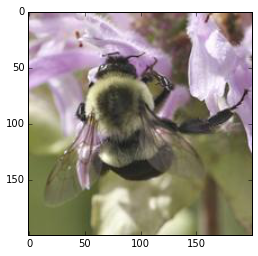

In [2]:
%matplotlib inline
import numpy as np
from matplotlib.pyplot import imshow 
import matplotlib.pyplot as plt
imshow(np.asarray(im))

In [ ]:
out1 = im.transpose(Image.FLIP_LEFT_RIGHT)
out2 = im.transpose(Image.ROTATE_90)
out3 = im.transpose(Image.ROTATE_270)

dest1 = "%s/910%d.jpg" % (dir, 3)
dest2 = "%s/920%d.jpg" % (dir, 3)
dest3 = "%s/930%d.jpg" % (dir, 3)

In [ ]:
fig = plt.figure()
a=fig.add_subplot(121)
imshow(np.asarray(im))
a=fig.add_subplot(122)
imshow(np.asarray(out1))

In [ ]:
fig = plt.figure()
a=fig.add_subplot(121)
imshow(np.asarray(out2))
a=fig.add_subplot(122)
imshow(np.asarray(out3))

In [ ]:
fig = plt.figure()
a=fig.add_subplot(121)
imshow(np.asarray(im))
a=fig.add_subplot(122)
imshow(np.asarray(out4))

In [3]:
def presize(image, nsize=(256,256)):
    return image.resize(nsize, resample=Image.ANTIALIAS)

In [ ]:
def rollh(image, deltah):
    "Roll an image horizontally"
    if deltah == 0 : return image
    image2 = Image.fromarray(np.asarray(image))
    xsize, ysize = image.size
    deltah = deltah % xsize
    if deltah > 0:
        part1 = image2.crop((0, 0, deltah, ysize))
        part2 = image2.crop((deltah, 0, xsize, ysize))
        image2.paste(part2, (0, 0, xsize-deltah, ysize))
        image2.paste(part1, (xsize-deltah, 0, xsize, ysize))
    else:
        part1 = image2.crop((xsize+deltah, 0, xsize, ysize))
        part2 = image2.crop((0, 0, xsize+deltah, ysize))
        image2.paste(part2, (-deltah, 0, xsize, ysize))
        image2.paste(part1, (0, 0, -deltah, ysize))
    return image2

def rollv(image, deltav):
    "Roll an image vertically"
    if deltav == 0 : return image
    image2 = Image.fromarray(np.asarray(image))
    xsize, ysize = image.size
    deltav = deltav % xsize
    part1 = image2.crop((0, 0, xsize, deltav))
    part2 = image2.crop((0, deltav, xsize, ysize))
    image2.paste(part2, (0, 0, xsize, ysize-deltav))
    image2.paste(part1, (0, ysize-deltav, xsize, ysize))
    return image2

In [4]:
def colorAverage( img ):
    # grab width and height
    width, height = img.size
    # make a list of all pixels in the image
    pixels = img.load()
    data = []
    for x in range(width):
        for y in range(height):
            cpixel = pixels[x, y]
            data.append(cpixel)
    r = 0
    g = 0
    b = 0
    counter = 0
    # loop through all pixels
    # if alpha value is greater than 200/255, add it to the average
    # (note: could also use criteria like, if not a black pixel or not a white pixel...)
    for x in range(len(data)):
        try:
            if data[x][3] > 200:
                r+=data[x][0]
                g+=data[x][1]
                b+=data[x][2]
        except:
            r+=data[x][0]
            g+=data[x][1]
            b+=data[x][2]
        counter+=1
    # compute average RGB values
    rAvg = r/counter
    gAvg = g/counter
    bAvg = b/counter
    return (rAvg, gAvg, bAvg)

In [ ]:
fig = plt.figure()
a=fig.add_subplot(131)
imshow(np.asarray(im))
a=fig.add_subplot(132)
imshow(np.asarray(rollh(im, 20)))
a=fig.add_subplot(133)
imshow(np.asarray(rollv(im, 20)))

In [20]:
def zoom(image, zoom_range):
    log_zoom_range = [np.log(z) for z in zoom_range]
    zoom = np.exp(np.random.uniform(*log_zoom_range))
    size_x, size_y = image.size
    im2 = image.copy()
    print zoom
    
    if zoom < 1:
        diffx = int(size_x * (1-zoom) / 2)
        diffy = int(size_y * (1-zoom) / 2)
        im2 = image.crop((diffx, diffy, size_x-diffx, size_y-diffy))
        im2 = presize(im2, (200,200))
    elif zoom > 1:
        max_x, max_y = (int(size_x*zoom), int(size_y*zoom))
        max_x = max_x if max_x % 2==0  else max_x -1
        max_y = max_y if max_y % 2==0  else max_y -1
        im1 = Image.new(mode="RGB",size=(max_x, max_y), color=colorAverage(image))
        hs = int((max_x-im2.size[0])/2)
        vs = int((max_y-im2.size[1])/2)
        im1.paste(im2, (hs,vs,max_x-hs,max_y-vs))
        im2 = presize(im1, (200,200))
    
    return im2

0.689892401894


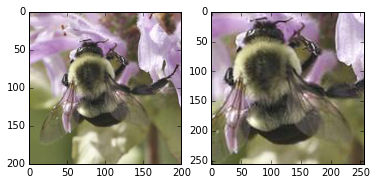

In [24]:
fig = plt.figure()
a=fig.add_subplot(121)
imshow(np.asarray(im))
a=fig.add_subplot(122)
im3 = zoom(im, (1/1.5, 1.5))
imshow(np.asarray(presize(im3)))

In [ ]:
def smallRotation(image, angle):
    im1 = Image.new(mode="RGB",size=(256,256), color=colorAverage(image))
    im2 = image.copy()
    hs = int((256-im2.size[0])/2)
    vs = int((256-im2.size[1])/2)
    im1.paste(im2, (hs,vs,256-hs,256-vs))
    im2 = im1.rotate(angle, resample=Image.BICUBIC, expand=False)
    im2 = im2.crop((28,28,228,228))
    return im2

In [ ]:
fig = plt.figure()
a=fig.add_subplot(121)
imshow(np.asarray(im))
a=fig.add_subplot(122)
imshow(np.asarray(smallRotation(im, -80)))

In [ ]:
iec = ImageEnhance.Color(im)

In [ ]:
fig = plt.figure()
a=fig.add_subplot(121)
imshow(np.asarray(im))
a=fig.add_subplot(122)
imshow(np.asarray(iec.enhance(2)))

In [ ]:
ies = ImageEnhance.Sharpness(im)

In [ ]:
fig = plt.figure()
a=fig.add_subplot(121)
imshow(np.asarray(im))
a=fig.add_subplot(122)
imshow(np.asarray(ies.enhance(2)))

In [ ]:
ieo = ImageEnhance.Contrast(im)

In [ ]:
fig = plt.figure()
a=fig.add_subplot(121)
imshow(np.asarray(im))
a=fig.add_subplot(122)
imshow(np.asarray(ieo.enhance(1.25)))

In [ ]:
ieb = ImageEnhance.Brightness(im)

In [ ]:
fig = plt.figure()
a=fig.add_subplot(121)
imshow(np.asarray(im))
a=fig.add_subplot(122)
imshow(np.asarray(ieb.enhance(1.25)))

In [ ]:
ima = perturb(im, rotation_range = (-120, 120), enhance=True)
imshow(np.asarray(ima))

In [ ]:
def randomEnhancement(image):
    e = random.randint(0,4)
    
    if e == 1: 
        ime = ImageEnhance.Color(image)
        outim = ime.enhance(2)
    elif e == 2:
        ime = ImageEnhance.Sharpness(image)
        outim = ime.enhance(2)
    elif e == 3: 
        ime = ImageEnhance.Contrast(image)
        outim = ime.enhance(1.25)
    elif e == 4: 
        ime = ImageEnhance.Brightness(image)
        outim = ime.enhance(1.25)
    else:
        outim = image.copy()
    
    return outim

In [39]:
def randomFilter(image):
    filters = [ImageFilter.BLUR, ImageFilter.DETAIL, ImageFilter.EDGE_ENHANCE, ImageFilter.SMOOTH, ImageFilter.SHARPEN, None]
    fi = filters[random.randint(0,5)]
    im2 = image.copy()
    if fi:
        im2 = im2.filter(fi)
    return im2

In [ ]:
def perturb(imag, roll_range = (-10, 10), zoom_range = (1/1.2 , 1.2), rotation_range = (-12, 12), enhance=False):
    outg = Image.fromarray(np.asarray(imag))
    #Random Roll
    dh = random.randint(roll_range[0], roll_range[1])
    dv = random.randint(roll_range[0], roll_range[1])
    outg = rollv(rollh(outg, dh), dv)
    #Random zoom
    outg = zoom(outg, zoom_range)
    #Random small rotation
    rr = random.randint(rotation_range[0], rotation_range[1])
    outg = smallRotation(outg, rr)
    #Random Enhancement
    if enhance:
        outg = randomEnhancement(outg)
    return presize(outg)

In [ ]:
perturbed_images = [perturb(im) for i in range(10)]

In [25]:
from PIL import ImageFilter

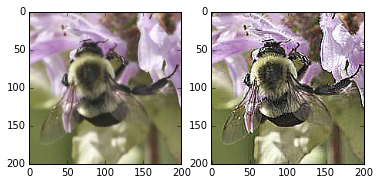

In [48]:
fig = plt.figure()
a=fig.add_subplot(121)
imshow(np.asarray(im))
a=fig.add_subplot(122)
im3 = randomFilter(im)
imshow(np.asarray(im3))